## Машинное обучение

Пензин М.С.

penzin.ml.tsu@gmail.com

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams
rcParams['figure.figsize'] = 12, 6
from matplotlib import pyplot as plt

# Теория вероятности

In [2]:
df = pd.read_csv("../data/mlbootcamp5_train.csv", 
                 sep=";", 
                 index_col="id")
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Случайная величина

Пусть $x$ - это некоторая случайная величина. Она может быть 
* дискретной
* непрерывной

## Дискретная случайная величина

Вероятность дискретной случайной величины можно определить как
$$
P(x) = \lim_{N \rightarrow \infty} \frac{n_{x}}{N}
$$

In [3]:
x = np.random.randint(0, 2, 100)
print(x[:10])
print(x.sum() / x.shape[0])

[0 1 1 1 0 0 0 0 0 1]
0.54


In [4]:
df['gender'].value_counts() / df.shape[0]

1    0.650429
2    0.349571
Name: gender, dtype: float64

## Непрерывная случайная величина

Вероятность непрерывной случайной величины всегда определяется в пределах какого-то интервала

$$
P(x \le \tilde{x} \le x + dx) = \lim_{N\rightarrow\infty} \frac{n_x}{N}
$$

Плотность вероятности:
$$
f(x)dx = P(x \le \tilde{x} \le x +dx)
$$

Функция вероятности
$$
P(x_1 \le \tilde{x} \le x_2) = \int_{x_1}^{x_2} f(x) dx = F(x_2) - F(x_1) \\
F(x) = P(\tilde{x} \le x) = \int_{-\infty}^x f(\tilde{x}) d\tilde{x}
$$

In [5]:
df[(65 <= df['weight']) & (df['weight'] <= 75)].shape[0] / df.shape[0]

0.36428571428571427

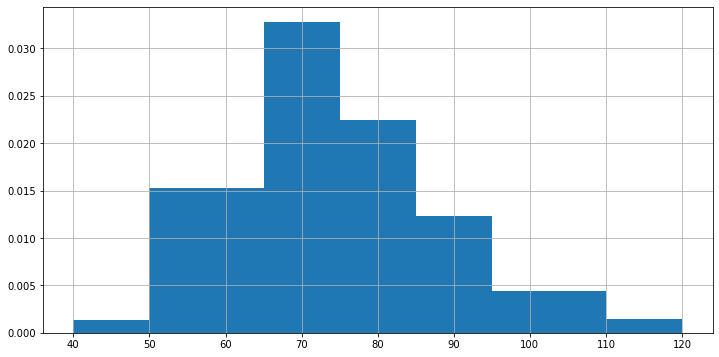

In [6]:
df['weight'].hist(bins=(40, 50, 65, 75, 85, 95, 110, 120), density=True);

## Биномиальное распределение

Пусть $p$ - вероятность выпадения орла, тогда вероятность того, что $r$ раз подряд выпадет орел и $N-r$ раз выпадет решка

$$
p^r (1 - p)^{N-r}
$$

Это всего лишь один из $C_N^r$ способов получить $r$ орлов при $N$ бросках монеты.

$$
P(r) = C_N^r p^r(1 - p)^{N-r} \\
C_N^r = \frac{N!}{r!(N-r)!}
$$

## Распределение Пуассона

Показывается вероятность появления $r$ событий за фиксированный промежуток времени при средней интенсивности событий $\lambda$

$$
P(r) = \frac{\lambda^r}{r!} e^{-\lambda}
$$

## Равномерное распределение

$$
f(x) = \left\{  
\begin{matrix}
\frac{1}{a-b},& x \in [a,b) \\
0,& x \notin [a,b)
\end{matrix}
\right.
$$

In [7]:
from scipy.stats import uniform

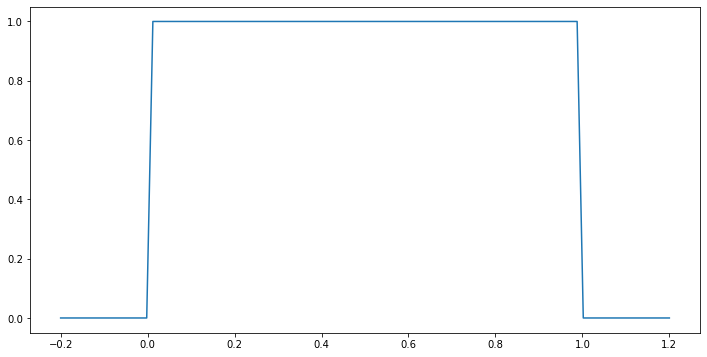

In [8]:
x = np.linspace(-0.2, 1.2, 100)
plt.plot(x, uniform.pdf(x));

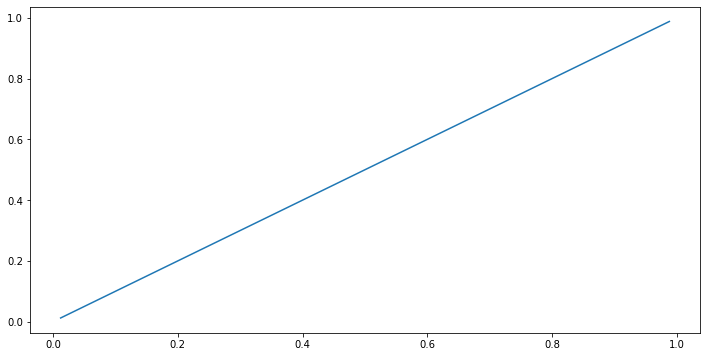

In [9]:
plt.plot(x, uniform.ppf(x));

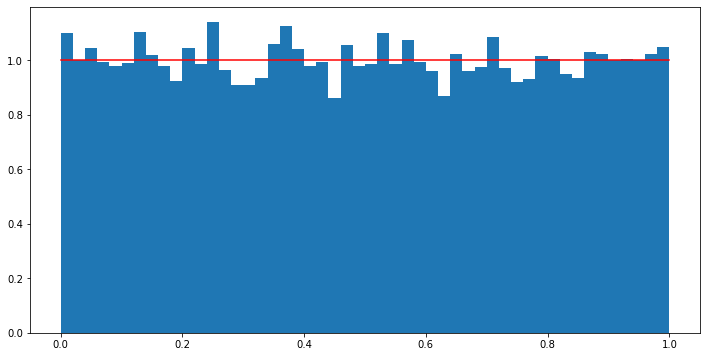

In [10]:
x = np.random.uniform(0, 1, 10000)
xv = np.linspace(x.min(), x.max(), 100)
plt.hist(x, density=True, bins=50)
plt.plot(xv, uniform.pdf(xv), "r");

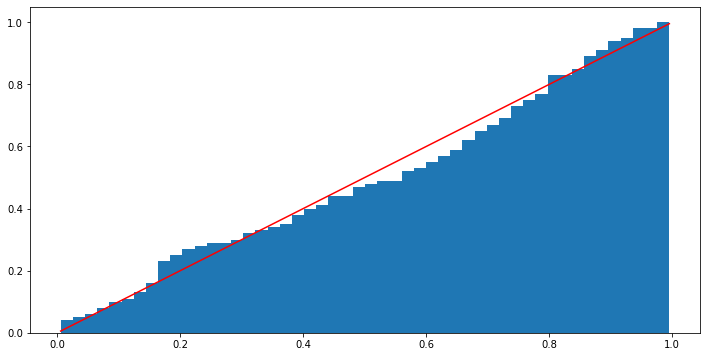

In [11]:
x = np.random.uniform(0, 1, 100)
xv = np.linspace(x.min(), x.max(), 100)
plt.hist(x, density=True, cumulative=True, bins=50)
plt.plot(xv, uniform.cdf(xv), "r");

## Нормальное распределение

$$
f(x) = \frac{1}{ \sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

In [12]:
from scipy.stats import norm

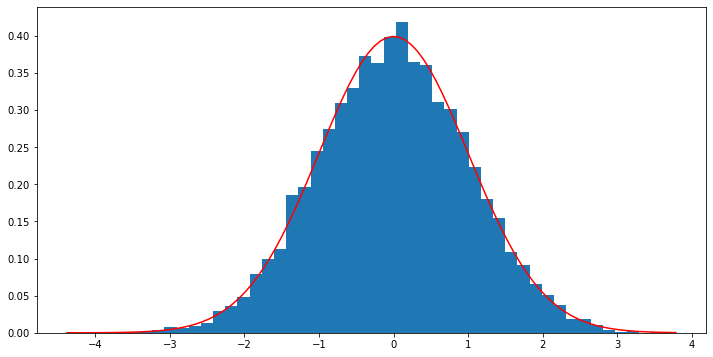

In [13]:
x = np.random.normal(0, 1, 10000)
xv = np.linspace(x.min(), x.max(), 100)
plt.hist(x, density=True, bins=50)
plt.plot(xv, norm.pdf(xv), "r")
plt.show()

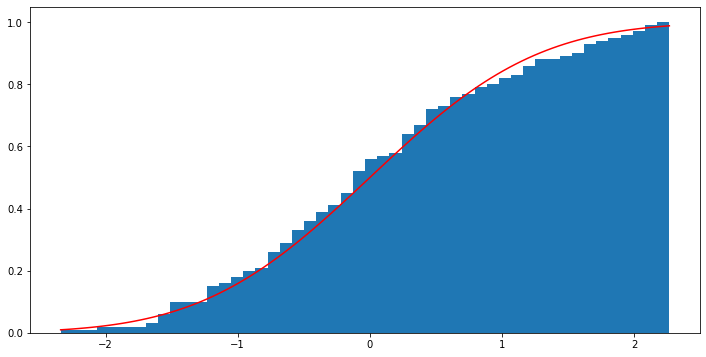

In [14]:
x = np.random.normal(0, 1, 100)
xv = np.linspace(x.min(), x.max(), 100)
plt.hist(x, density=True, cumulative=True, bins=50)
plt.plot(xv, norm.cdf(xv), "r")
plt.show()

## Математическое ожидание (среднее)

Для дискретное случайной величины

$$
\mu = E[x] = \sum_r r P(x=r)
$$

Для непрерывной случайной величины

$$
\mu = E[x] = \int_{-\infty}^{+\infty} x f(x) dx
$$

Можно определенить среднее значение функции от случайной величины $x$

Для дискретной

$$
\mu = E[g(x)] = \sum_r g(r) P(x=r)
$$

Для непрерывной

$$
\mu = E[g(x)] = \int_{-\infty}^{+\infty} g(x) f(x) dx
$$

## Среднеквадратичное отклонение (дисперсия)

Для дискретной

$$
\sigma^2 = D[x] = \sum_r (r-\mu)^2 P(x=r)
$$

Для непрерывной
$$
\sigma^2 = D[x] = \int_{-\infty}^{\infty} (x-\mu)^2 f(x) dx
$$

## Выборочное среднее и выборочная дисперсия

$$
    \bar{\mu} = \frac{1}{N} \sum_{i=0}^{N-1} x_i
$$

$$
    \bar{\sigma}^2 = \frac{\sum_{i=0}^{N-1} \left(x_i^2 - \bar{x}^2 \right) }{N-1}
$$

## Сложение вероятностей

$$
P(A+B) = P(A) + P(B) - P(AB)
$$

<center><img style="margin-left:auto; margin-right: auto" src="AB.png"/></center>

## Условная вероятность

Пусть

$$
P(A) = \frac{n_A}{N}\quad P(AB) = \frac{n_{AB}}{N} \\
P(AB) = \frac{n_A}{N}\frac{n_{AB}}{n_A} = P(A) \frac{n_{AB}}{n_A}
$$

**Условная вероятность** - это вероятность события __B__, при условии, что событие **A** уже произошло 

$$
P(B|A) = \frac{P(AB)}{P(A)}
$$

## Независимые события

Если на появления события __B__ не влияет появление события **A**, то данные события считаются независимыми

$$
P(B|A) = P(B) \\
P(AB) = P(A) P(B)
$$

## Ещё немного условной вероятности

Если подумать, то мы можем записать $P(AB)$ двумя способами

$$
P(AB) = P(A) P(B|A) = P(B) P(A|B)
$$

## Теорема Байеса

$$
P(A|B) = \frac{P(B|A) P(A)}{P(B)}
$$
* __P(A)__ - априорная вероятность гипотезы A
* __P(B)__ - полная вероятность события B
* __P(A|B)__ - вероятность гипотезы A при наступлении события B (апостериорная вероятность)
* __P(B|A)__ - вероятность наступления события B при истинности гипотезы A

## Формула полной вероятности

Если считать, что множество событий $\{A_i\}_{i=1}^N$ несовместны

$$
P(B) = \sum_i P(A_i) P(B|A_i)
$$

## Пример

Пусть имеется некое заболевание и имеется тест, которые позволяет его определить.

$$
P(+|болен) = 0.80 \\
P(-|болен) = 0.20 
$$

**Какова вероятность, что человек болен, если тест дал положительный результат?**

## Дополнительная информация

$$
\begin{matrix}
P(+|болен) = 0.80, & P(+|здоров) = 0.096 \\
P(-|болен) = 0.20, & P(-|здоров) = 0.904
\end{matrix}
$$

**Какова вероятность, что человек действительно болен, если тест дал положительный результат?**

## Дополнительная информация

$$
\begin{matrix}
P(+|болен) = 0.80, & P(+|здоров) = 0.096 \\
P(-|болен) = 0.20, & P(-|здоров) = 0.904 \\
P(болен) = 0.01,   & P(здоров) = 0.99
\end{matrix}
$$

$$
P(болен|+) = \frac{P(+|болен)P(болен)}{P(болен)P(+|болен) + P(здоров)P(+|здоров)}
$$

In [15]:
pa = 0.01
0.80 * pa / ( pa * 0.80 + (1 - pa) * 0.096 )
# 0.096 * (1 - pa) / ( pa * 0.80 + (1 - pa) * 0.096 )

0.07763975155279504

$$
P(болен|+) = \frac{P(+|болен)}{P(+)}P(болен)
$$

## Наивный байесовский классификатор

Вернемся к нашим данным по заболеваниям сердечно сосудистой системы. Для того, чтобы определить вероятность болен человек или нет, нам нужно найти следующую величину

$$
P(болен | \vec{x})
$$

Если использовать теорему Байеса

$$
P(болен|\vec{x}) = \frac{P(\vec{x}|болен) P(болен)}{P(\vec{x})}
$$

## Что мы имеем?

* $P(болен)$ - это априорная информация, мы должны её получить из дополнительных исследований или взять какую-то модель
* $P(\vec{x})$ - можно найти по формуле полной вероятности, фактически является нормирующим коэфициентом
* $P(\vec{x}|болен)$ - это мы должны найти из наблюдаемых признаков

Как же мы будем искать $P(\vec{x}|болен)$?

Мы можем посчитать это исходя из имеющихся данных. Можно отобрать все события "болен" и посмотреть какое распределение мы получим.

Сделаем очень сильное заявление. Пусть все признаки являются **независимыми** случайными величинами. В этом случае, мы можем записать $P(\vec{x}|болен)$ как 

$$
P(\vec{x}|болен) = \prod_i P(x_i | болен)
$$

$$
P(болен|\vec{x}) = \frac{ P(болен)}{ P(\vec{x}) }  \prod_i P(x_i | болен) 
$$

$$
P(болен|\vec{x}) \propto P(болен) \prod_i P(x_i | болен) 
$$

$$
\ln P(болен|\vec{x}) \propto \ln P(болен) + \sum_i \ln P(x_i | болен) 
$$

## Итого

Чтобы определить болен человек или нет, нам достаточно посчитать два выражения

$$
\ln P(болен|\vec{x}) = \ln P(болен) + \sum_i \ln P(x_i | болен) \\
\ln P(здоров|\vec{x}) = \ln P(здоров) + \sum_i \ln P(x_i | здоров) 
$$

## Scikit-learn 

Мощная библиотека, включающая в себя огромное число современных алгоритмов инструментов для анализа данных.

```
python -m pip install sklearn
```

## Простая реализация

В **sklearn** уже реализована поддержка наивного байесовского классификатора.

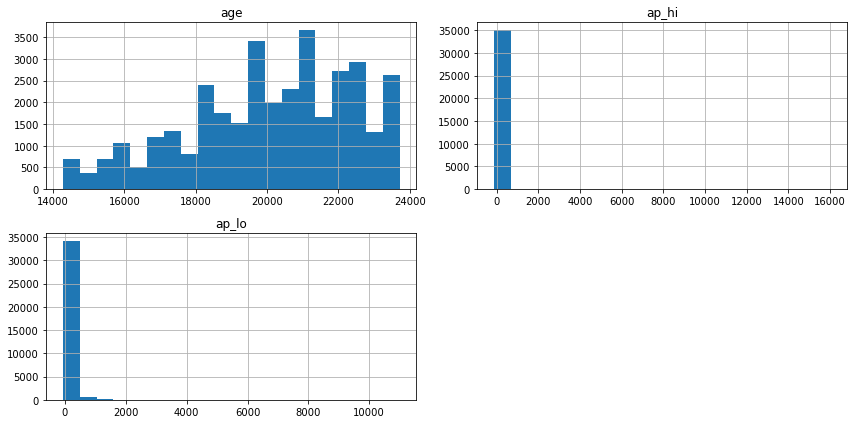

In [16]:
df[df["cardio"] == 1][["age", "ap_hi", "ap_lo"]].hist(bins=20)
plt.tight_layout()

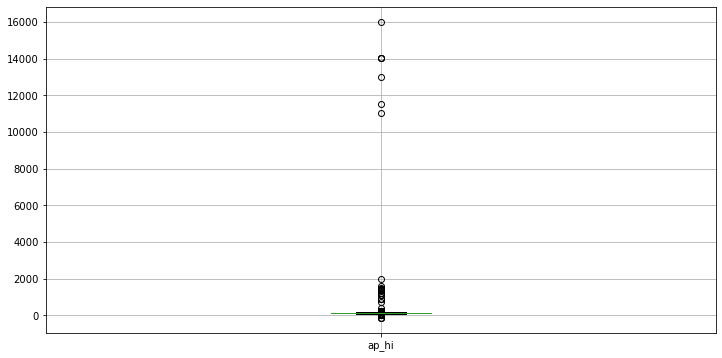

In [17]:
df[df["cardio"] == 1][["ap_hi"]].boxplot();

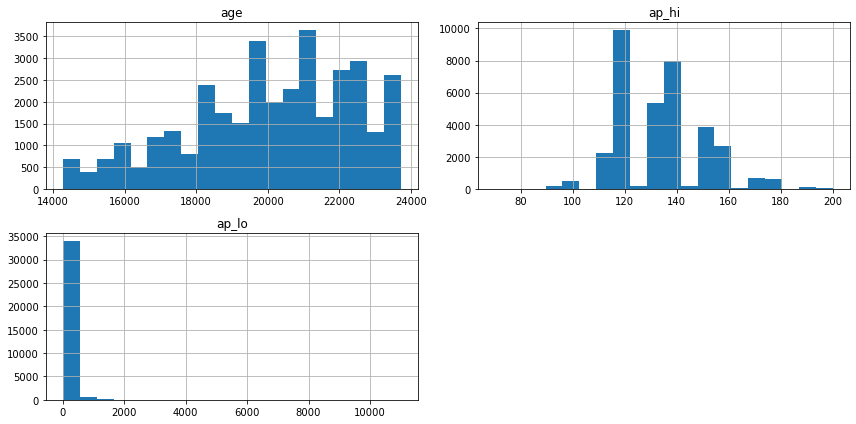

In [18]:
# уберем проблемы с давлением
data = df[(df["ap_hi"] >= 50) & (df["ap_hi"] <= 200)]
data[data["cardio"] == 1][["age", "ap_hi", "ap_lo"]].hist(bins=20)
plt.tight_layout()

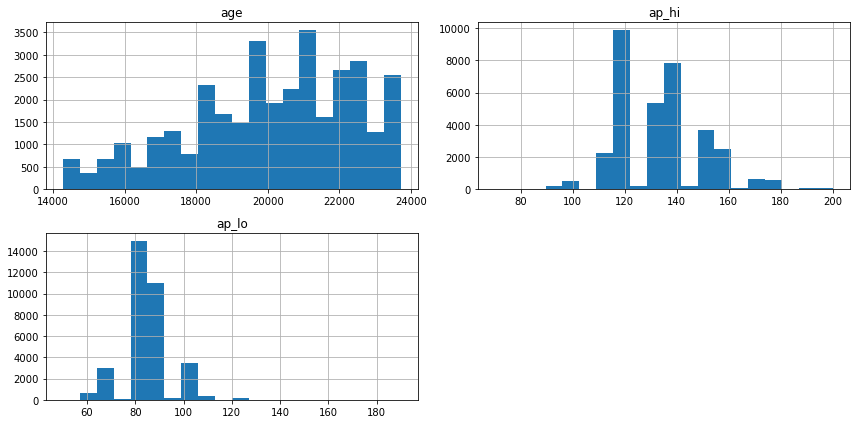

In [19]:
data = data[(data["ap_lo"] >= 50) & (data["ap_lo"] <= 200)]
data[data["cardio"] == 1][["age", "ap_hi", "ap_lo"]].hist(bins=20)
plt.tight_layout()

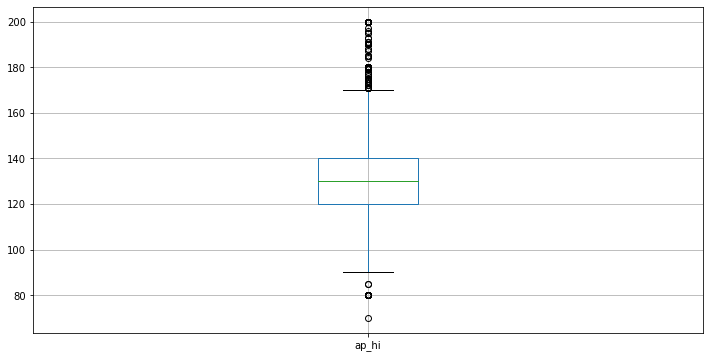

In [20]:
data[data["cardio"] == 1][["ap_hi"]].boxplot();

## Гауссов класификатор

Для непрерывной случайной величины, мы нередко можем сделать предположение, что она распределена по гауссу, в этом случае 

$$
P(x|C_k) = \frac{1}{\sqrt{2\pi  \sigma_k^2}} e^{-\frac{(x-\mu_k)^2}{2\sigma^2_k}}
$$

In [21]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

train = data[["age", "weight", "height"]]
target = data["cardio"]

model = gnb.fit(train, target)
predict = model.predict(train)
print(data.shape[0],
     (target == predict).sum() / data.shape[0])

predict

68703 0.6206279201781582


array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [22]:
model.predict(train[1:2]), model.predict_proba(train[1:2])

(array([1], dtype=int64), array([[0.38787157, 0.61212843]]))

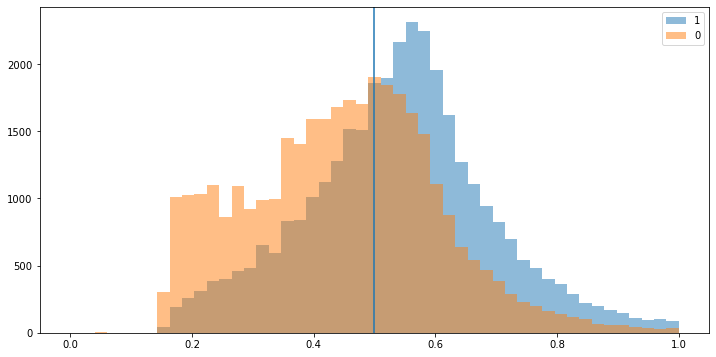

In [23]:
prob = model.predict_proba(train)[:,1]
plt.hist(prob[target == 1], bins=np.linspace(0, 1, 50), alpha=0.5, label="1");
plt.hist(prob[target == 0], bins=np.linspace(0, 1, 50), alpha=0.5, label="0");
plt.axvline(0.5)
plt.legend();

In [24]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(target, predict)

In [25]:
import itertools
class_names = ["Здоров", "Болен"]
def plot_confusion_matrix(cm, classes, normalize=False, title='Матрица неточностей', cmap=plt.cm.Blues):    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.4f' if normalize else 'd'
    thresh = cm.min() + (cm.max() - cm.min()) * 2 / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Истина')
    plt.xlabel('Предсказание')
    plt.tight_layout()

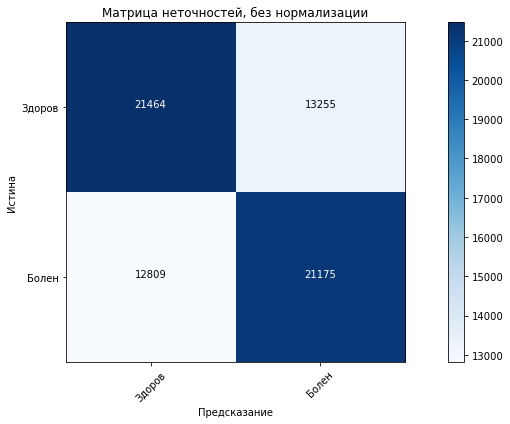

In [26]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      title='Матрица неточностей, без нормализации')
plt.show()

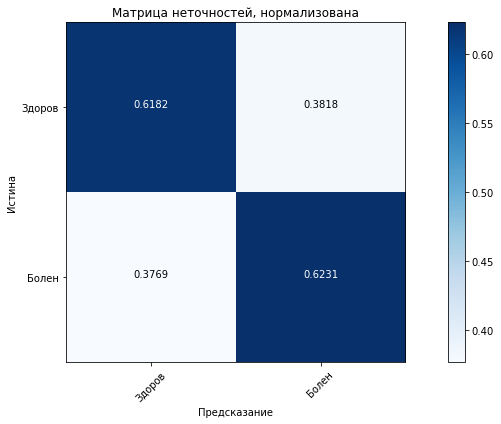

In [27]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,                      
                      title='Матрица неточностей, нормализована')
plt.show()

## Ещё немного наивного Байеса

Пакет **sklearn** помимо гауссова класификатора содержит

 * мультиномиальный класификатор __MultinomialNB__ или его чуть более доработанная версия **ComplementNB** (особенно в случае несбалансированных данных). Использует аддитивное сглаживание (additive smoothing). Является расширением биномиального распределения. Подходит для анализа текстов.
 * классификатор на основе распределения Бернулли __BernoulliNB__. Подходит для бинарных признаков.

## Что почитать?

* K.P. Murphy Machine Learning. A Probabilistic Perspective.
* C.E. Rasmussen and C.K.I. Williams. Gaussian Processes for Machine Learning